<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_maio_2020/blob/master/06_ANN_varios_graos_e_indefinido_maio_04_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# neste caso ele seleciona os varios graos


In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import math
import pandas as pd
#from sklearn.neural_network import MLPRegressor
#from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score 
from mpl_toolkits.mplot3d import Axes3D, axes3d
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
import re
%matplotlib inline

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras



print(tf.__version__)

2.2.0-rc3


In [3]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
!pip install mahotas
import Go2BlackWhite
import Go2Mahotas
import mahotas.features.texture as mht
import mahotas.features
import zipfile
import re
from sklearn.model_selection import train_test_split

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [4]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
#!ls

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


In [0]:
Size=28 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

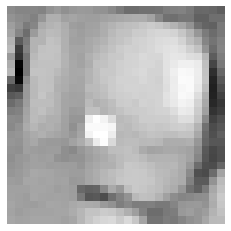

In [7]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)
plt.axis("off")
plt.imshow(ww[10], cmap = "gray")

In [8]:
np.array(ww).shape

(882, 28, 28)

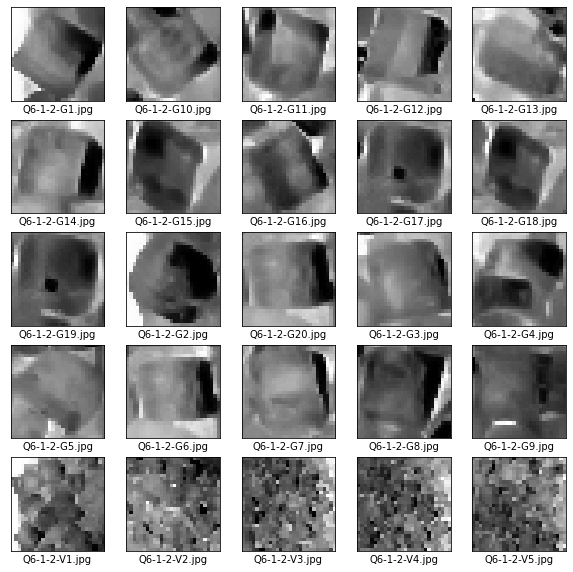

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap=plt.cm.binary)
    plt.xlabel(img_name[i])
plt.show()

In [10]:
y_valor=[]
Varios='V'
for x in img_name:
  if re.search(Varios, x):
    y_valor.append(1)
  else:
    y_valor.append(2)
print(y_valor)
print(len(y_valor))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 

In [0]:
W_train, W_test, yw_train, yw_test = train_test_split(np.array(ww), np.array(y_valor), 
                                                    test_size=0.20, 
                                                    random_state=42)

In [0]:
train_images=W_train
train_labels=yw_train
test_images=W_test
test_labels=yw_test

In [13]:
print(np.array(W_train).shape)
print(np.array(W_test).shape)

(705, 28, 28)
(177, 28, 28)


In [14]:
print(yw_train)
print('=====================')
print(yw_test)

[2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 2 1
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2
 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 1 1 2 2 1 2 2 2 2 1
 2 1 2 2 2 2 2 1 1 1 2 2 2 2 1 2 1 1 2 1 2 1 2 2 2 2 2 1 2 1 1 2 2 2 2 2 2
 2 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 1
 2 2 2 1 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 1 1 2 2 1 2 1 1 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 2 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2
 2 2 1 2 1 2 2 2 2 1 2 2 1 2 2 2 1 2 1 2 1 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2
 2 2 1 2 1 2 2 2 1 2 2 1 

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
23/23 [==============================] - 0s 2ms/step - loss: 66.9714 - accuracy: 0.6355 
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 34.1627 - accuracy: 0.6950
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 24.8815 - accuracy: 0.7404
Epoch 4/10
23/23 [==============================] - 0s 2ms/step - loss: 12.4157 - accuracy: 0.7433
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 12.5868 - accuracy: 0.7574
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 12.2553 - accuracy: 0.7546
Epoch 7/10
23/23 [==============================] - 0s 2ms/step - loss: 7.5259 - accuracy: 0.7943
Epoch 8/10
23/23 [==============================] - 0s 3ms/step - loss: 9.6444 - accuracy: 0.7787
Epoch 9/10
23/23 [==============================] - 0s 2ms/step - loss: 66.9749 - accuracy: 0.6652
Epoch 10/10
23/23 [==============================] - 0s 2ms/step - loss: 11.3512 - accuracy: 0.7730


In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

6/6 - 0s - loss: 34.9899 - accuracy: 0.8136

Test accuracy: 0.8135592937469482
